In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import numpy as np
import time
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
scaler = preprocessing.MinMaxScaler()


In [2]:
def time_ms():
    return round(time.time()*1000)

def clean_column_ids(df, col):
    return df[col].map(lambda x: x.split("|")[1])

def parse_fasta(protein_fasta):
    id = protein_fasta.split("\n")[0]
    sequence = ''.join(protein_fasta.split("\n")[1:])
    return (id, sequence)

In [3]:
def read_score(path):
    df = pd.read_csv(path,   delimiter=r"\s+", comment="#", usecols=[0,2,4,5,6], header=None)
    df.columns = ["sequence", "reference", "eval", "score", "bias"]
    df.sort_values(by=["score"], inplace=True, ascending=False)
    df["sequence"] = clean_column_ids(df, "sequence")
    df.set_index("sequence", inplace=True)
    return df
def read_family(path):
    df = None
    try:
        df = pd.read_csv(path, delimiter=r"\s+", comment="#", usecols=[0,2,4,5,6,17], header=None)
    except pd.errors.EmptyDataError:
        return pd.DataFrame(columns=["family", "seq", "f_eval", "f_score", "f_bias", "n_dom"])
    df.columns = ["family", "seq", "f_eval", "f_score", "f_bias", "n_dom"]
    df["seq"] = clean_column_ids(df, "seq")
    #df.drop_duplicates(subset=["seq"], keep="first", inplace=True)
    df.set_index("seq", inplace=True)
    return df
def read_len(path):
    db_fasta = ""
    with open(path, "r") as f:
        db_fasta = ("\n" + f.read()).split("\n>")[1:]
    a = []
    for protein_fasta in db_fasta:
        id, seq = parse_fasta(protein_fasta)
        id = id.split("|")[1]
        a.append((id, seq, len(seq)))
    return pd.DataFrame(a, columns=["seq", "str", "seqlen"]).set_index("seq").rename_axis(index=None)
    

In [4]:
def splot(dfs, x, y, hue=None, legend=True, ylog=False):
    f, ax = plt.subplots(3,2, figsize=(14,20))
    sb.set_theme(style="whitegrid")
    if ylog:
        ax.set(yscale="log")
        ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    ax = ax.flatten()
    for i, key in enumerate(dfs.keys()):
        sb.scatterplot(x=x, y=y, hue=hue, ax=ax[i], data=dfs[key]).set_title(key)
        if ax[i].get_legend() and not legend:
            ax[i].get_legend().remove()
    f.show()

In [5]:
def load_all(path, normalise=False):
    hmms_files = sorted(glob.glob(path.replace("$$$", "hmmsearch")))
    phmm_files = sorted(glob.glob(path.replace("$$$", "phmmer")))
    fasta_files = sorted(glob.glob(path.replace("$$$", "clean").replace(".out", ".clean.fasta")))
    dfs = []
    files = list(zip(hmms_files, phmm_files, fasta_files))
    for file in files:
        ref = file[0].split("/")[-1].split(".")[0]
        hmms_df = read_score(file[0]).rename(columns={"score" : "hmms_score", "eval" : "hmms_eval", "bias" : "hmms_bias"})
        phmm_df = read_score(file[1]).rename(columns={"score" : "phmm_score", "eval" : "phmm_eval", "bias" : "phmm_bias"})
        phmm_df.drop(["reference"], axis=1, inplace=True)
        len_df = read_len(file[2])
        df = pd.concat([hmms_df, phmm_df, len_df], axis=1)
        if normalise:
            df["phmm_score"] = scaler.fit_transform(df["phmm_score"].values.reshape(-1,1))
            df["hmms_score"] = scaler.fit_transform(df["hmms_score"].values.reshape(-1,1))
        dfs.append(df)
    frame = pd.concat(dfs, axis=0)
    return frame


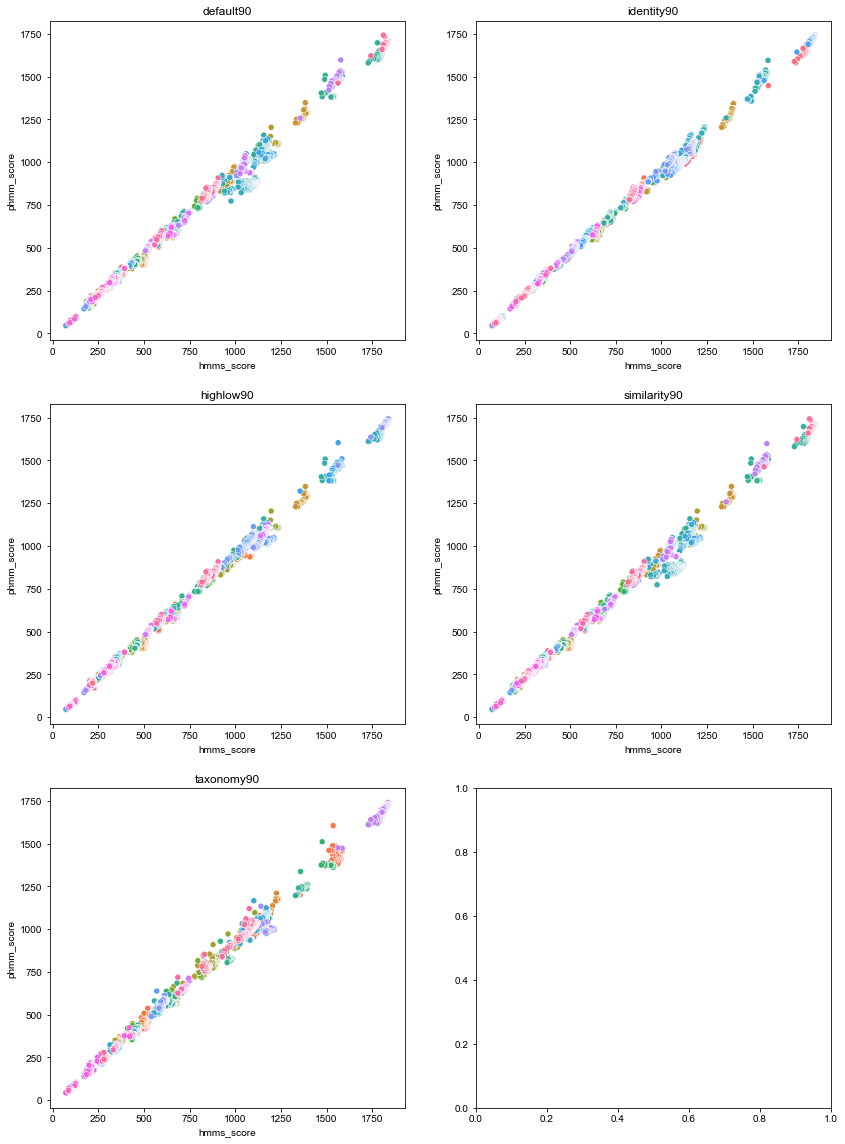

In [6]:
df90 = load_all("./../out/clustering/uniprot_sprot.90.multi-step/$$$/*.out")
ide90 = load_all("./../out/identity/uniprot_sprot.90.multi-step/$$$/*.out")
hl90 = load_all("./../out/highlow/uniprot_sprot.90.multi-step/$$$/*.out")
sim90 = load_all("./../out/similarity/uniprot_sprot.90.multi-step/$$$/*.out")
tax90 = load_all("./../out/taxonomy/uniprot_sprot.90.multi-step/$$$/*.out")
dict90 = {"default90":df90, "identity90":ide90, "highlow90":hl90, "similarity90":sim90, "taxonomy90":tax90}
splot(dict90, "hmms_score", "phmm_score", hue="reference", legend=False)

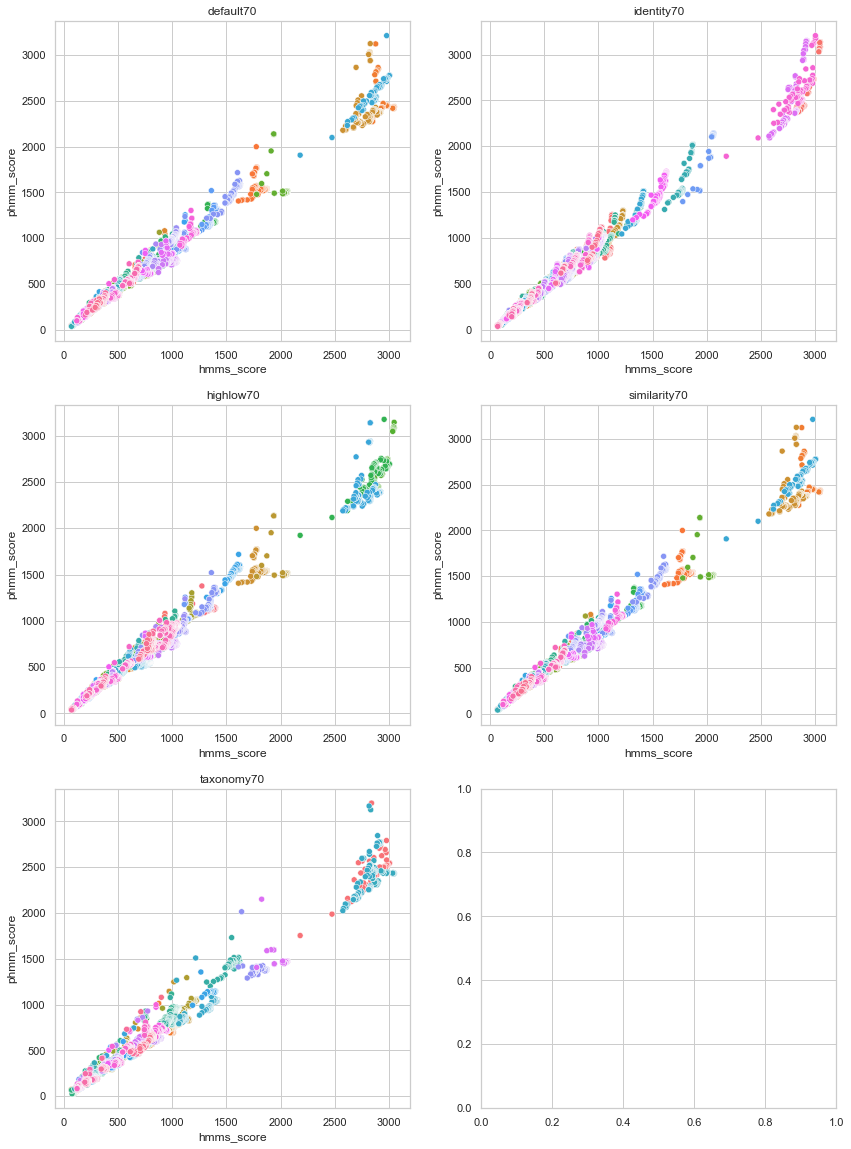

In [7]:
df70 = load_all("./../out/clustering/uniprot_sprot.70.multi-step/$$$/*.out")
ide70 = load_all("./../out/identity/uniprot_sprot.70.multi-step/$$$/*.out")
hl70 = load_all("./../out/highlow/uniprot_sprot.70.multi-step/$$$/*.out")
sim70 = load_all("./../out/similarity/uniprot_sprot.70.multi-step/$$$/*.out")
tax70 = load_all("./../out/taxonomy/uniprot_sprot.70.multi-step/$$$/*.out")
dict70 = {"default70":df70, "identity70":ide70, "highlow70":hl70, "similarity70":sim70, "taxonomy70":tax70}
splot(dict70, "hmms_score", "phmm_score", hue="reference", legend=False)

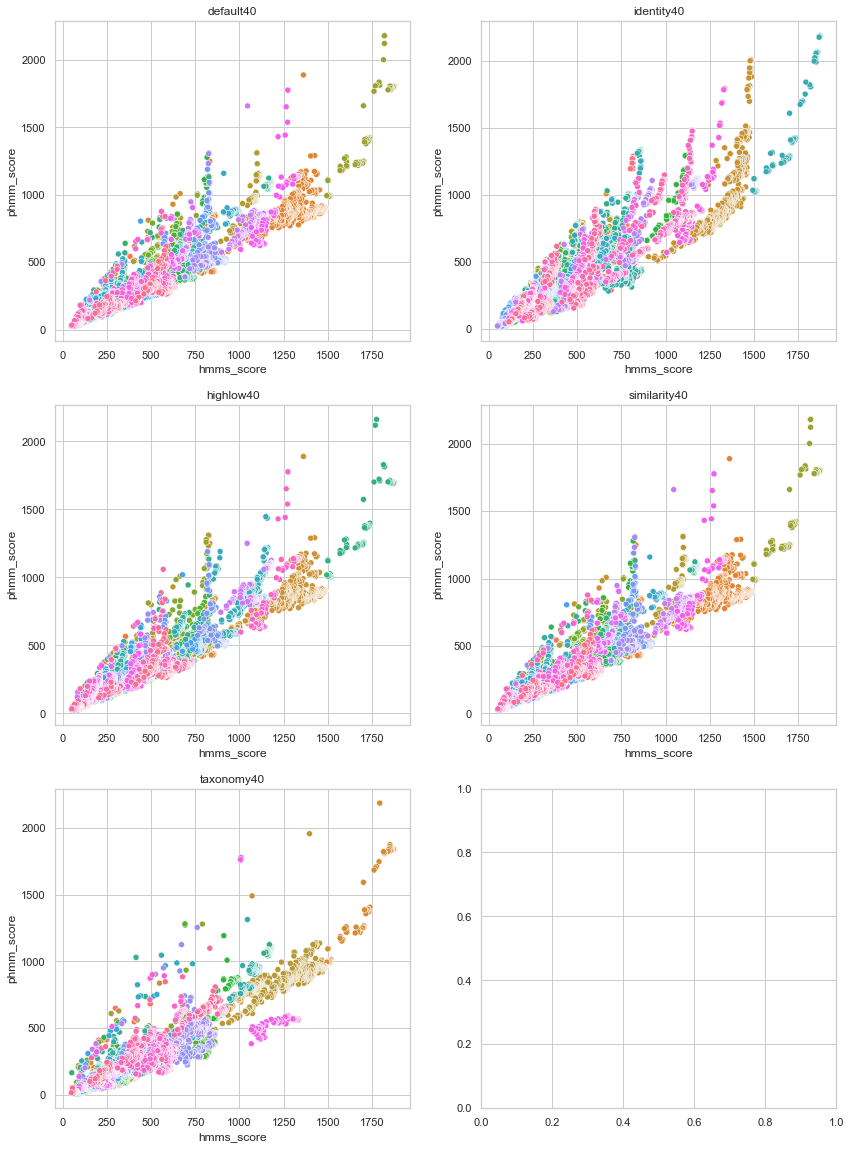

In [8]:
df40 = load_all("./../out/clustering/uniprot_sprot.40.multi-step/$$$/*.out")
ide40 = load_all("./../out/identity/uniprot_sprot.40.multi-step/$$$/*.out")
hl40 = load_all("./../out/highlow/uniprot_sprot.40.multi-step/$$$/*.out")
sim40 = load_all("./../out/similarity/uniprot_sprot.40.multi-step/$$$/*.out")
tax40 = load_all("./../out/taxonomy/uniprot_sprot.40.multi-step/$$$/*.out")
dict40 = {"default40":df40, "identity40":ide40, "highlow40":hl40, "similarity40":sim40, "taxonomy40":tax40}
splot(dict40, "hmms_score", "phmm_score", hue="reference", legend=False)

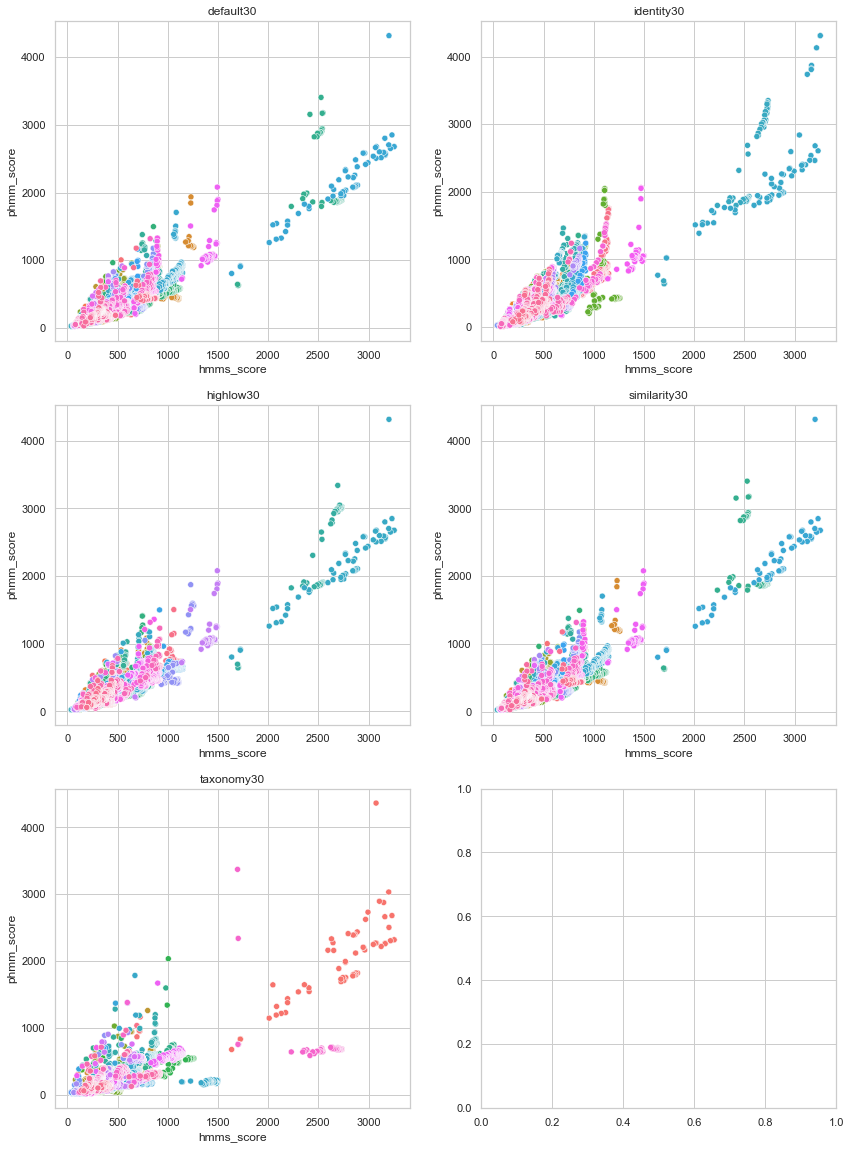

In [9]:
df30 = load_all("./../out/clustering/uniprot_sprot.30.multi-step/$$$/*.out")
ide30 = load_all("./../out/identity/uniprot_sprot.30.multi-step/$$$/*.out")
hl30 = load_all("./../out/highlow/uniprot_sprot.30.multi-step/$$$/*.out")
sim30 = load_all("./../out/similarity/uniprot_sprot.30.multi-step/$$$/*.out")
tax30 = load_all("./../out/taxonomy/uniprot_sprot.30.multi-step/$$$/*.out")
dict30 = {"default30":df30, "identity30":ide30, "highlow30":hl30, "similarity30":sim30, "taxonomy30":tax30}
splot(dict30, "hmms_score", "phmm_score", hue="reference", legend=False)

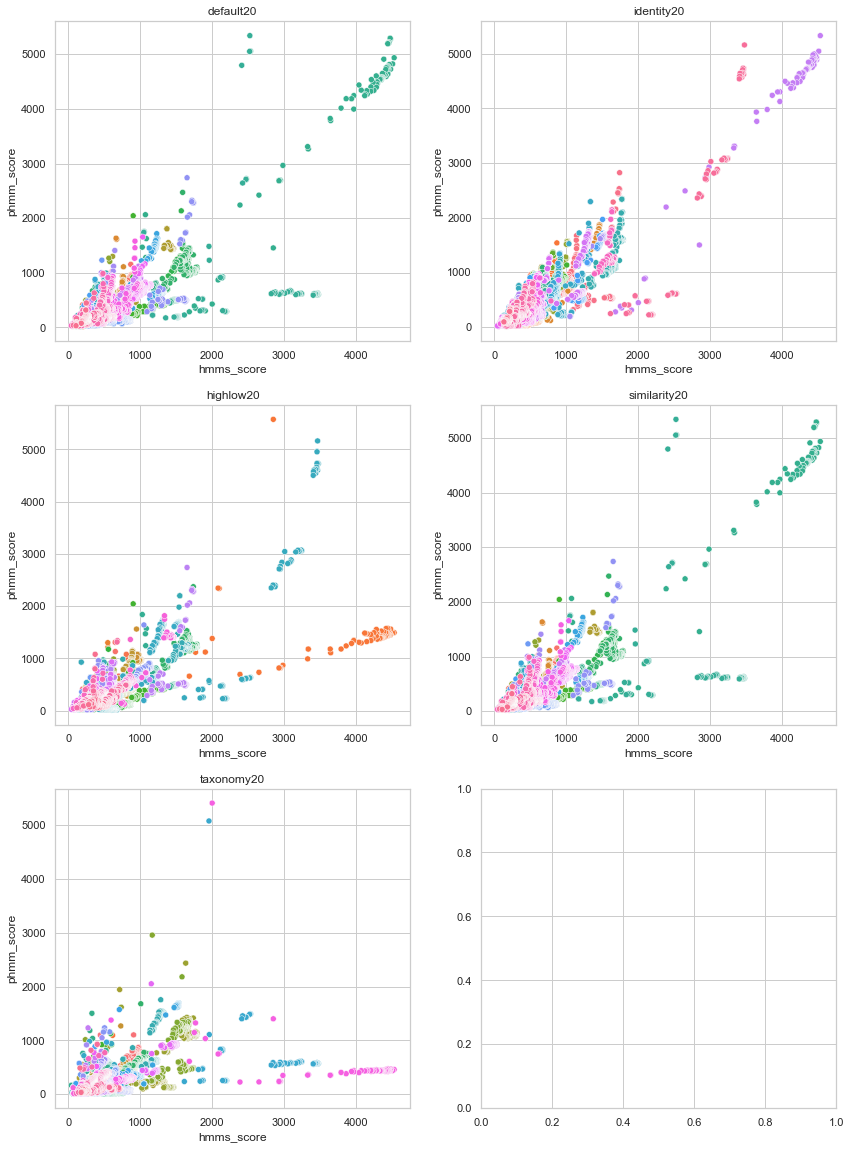

In [10]:
df20 = load_all("./../out/clustering/uniprot_sprot.20.multi-step/$$$/*.out")
ide20 = load_all("./../out/identity/uniprot_sprot.20.multi-step/$$$/*.out")
hl20 = load_all("./../out/highlow/uniprot_sprot.20.multi-step/$$$/*.out")
sim20 = load_all("./../out/similarity/uniprot_sprot.20.multi-step/$$$/*.out")
tax20 = load_all("./../out/taxonomy/uniprot_sprot.20.multi-step/$$$/*.out")
dict20 = {"default20":df20, "identity20":ide20, "highlow20":hl20, "similarity20":sim20, "taxonomy20":tax20}
splot(dict20, "hmms_score", "phmm_score", hue="reference", legend=False)

In [11]:
def group_info(df, s):
    refs = df.drop_duplicates(subset="reference")["reference"].to_numpy()
    hmms_std = 0.0
    phmm_std = 0.0
    phmm_mad = 0.0
    hmms_mad = 0.0
    pearson_corr = 0.0
    spearman_corr = 0.0
    for ref in refs:
        temp = df.loc[df["reference"] == ref]
        std = temp.std()
        mad = temp.mad()
        hmms_std += std["hmms_score"]
        phmm_std += std["phmm_score"]
        hmms_mad += mad["hmms_score"]
        phmm_mad += mad["phmm_score"]
        pearson_corr += temp.corr(method="pearson")["hmms_score"]["phmm_score"]
        spearman_corr += temp.corr(method="spearman")["hmms_score"]["phmm_score"]

    # print("STD: hmms: %.2f phmm: %.2f" % (hmms_std/len(refs), phmm_std/len(refs)))
    # print("MAD: hmms: %.2f phmm: %.2f" % (hmms_mad/len(refs), phmm_mad/len(refs)))
    # print("Pearson correlation: %.2f" % pearson_corr)
    # print("Spearman correlation: %.2f" % spearman_corr)
    # print("--------")
    hmms_std /= len(refs)
    phmm_std /= len(refs)
    hmms_mad /= len(refs)
    phmm_mad /= len(refs)
    pearson_corr /= len(refs)
    spearman_corr /= len(refs)
    return {  "hmms_std":hmms_std, "phmm_std":phmm_std,
                                "hmms_mad":hmms_mad, "phmm_mad":phmm_mad, 
                                "pearson":pearson_corr, "spearman":spearman_corr, "group":s}

def dict_info(dict):
    data = pd.DataFrame(columns=["hmms_std", "phmm_std", "hmms_mad", "phmm_mad", "pearson", "spearman", "group"])
    for key in dict.keys(): 
       d = group_info(dict[key], key)
       data = data.append(d, ignore_index=True)
    f, ax = plt.subplots(1, 4, figsize=(20,4))
    ax = ax.flatten()
    sb.lineplot(y="phmm_std", x="group", data=data, marker="o", ax=ax[0]).set_title("Standard Deviation")
    sb.lineplot(y="phmm_mad", x="group", data=data, marker="o", ax=ax[1]).set_title("Mean Absolute Deviation")
    sb.lineplot(y="pearson", x="group", data=data, marker="o", ax=ax[2]).set_title("Pearson Correlation")
    sb.lineplot(y="spearman", x="group", data=data, marker="o", ax=ax[3]).set_title("Spearman Correlation")
    f.show()
    

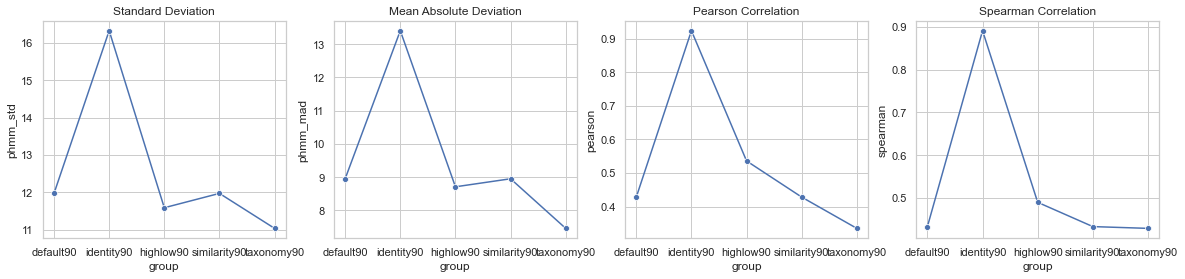

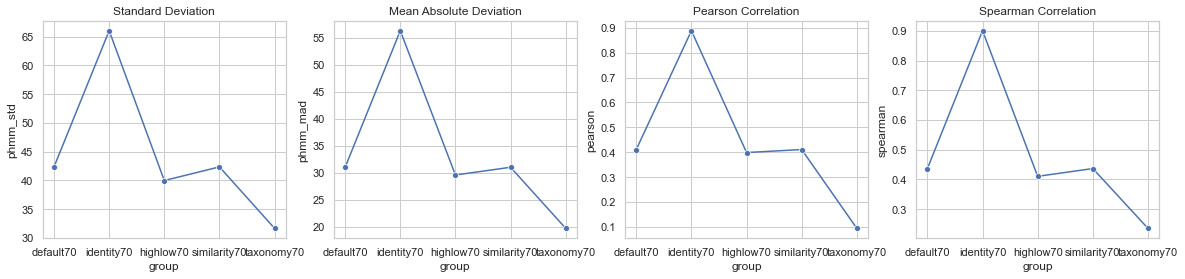

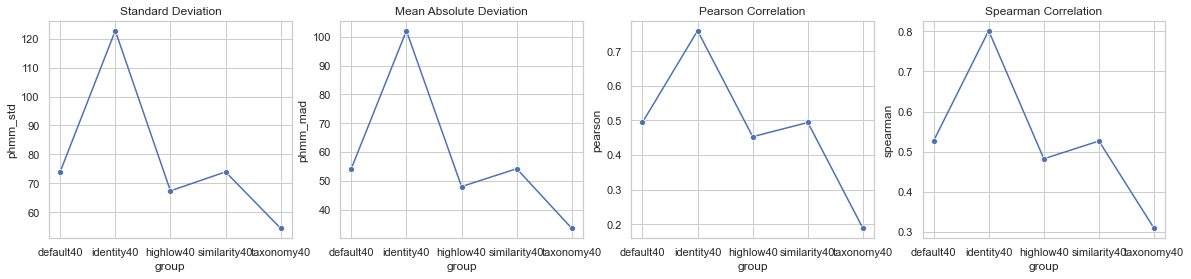

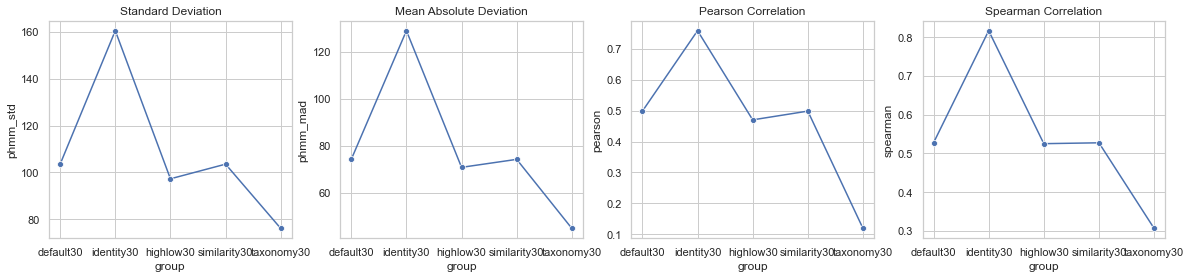

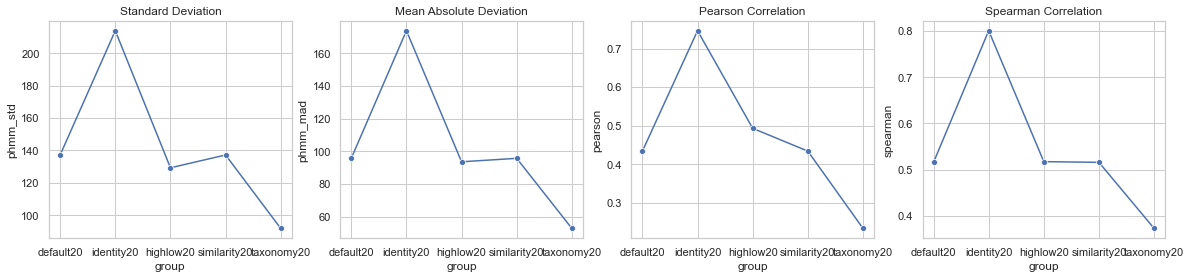

In [12]:
dict_info(dict90)
dict_info(dict70)
dict_info(dict40)
dict_info(dict30)
dict_info(dict20)